In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file1 = "./AirPollution_6-10.csv"
file2 = "./AirPollution_10-5.csv"

def merge_file(file1, file2, result_file='Air.csv'):
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Đồng bộ tên cột
    df2.columns = df1.columns

    # Ghép dữ liệu
    result = pd.concat([df1, df2], axis=0, ignore_index=True)
    
    # Chuyển cột đầu tiên về định dạng Unix timestamp
    result.iloc[:, 0] = pd.to_datetime(result.iloc[:, 0], dayfirst=True).astype('int64') // 10**9
    
    if result_file == 'Air.csv':
        result.columns = ['timestamp','aqi','co','no','no2','o3','so2','pm2_5','pm10','nh3']
    else:
        result.columns = ['timestamp','Temprature (Kelvin)','Feels like (Kelvin)','Pressure (mb)','Humidity (%)','Min Temprature (Kelvin)','Max Temprature (Kelvin)','Wind speed (m/s)','Wind degree','Wind gust (m/s)','Clouds all (%)','Rain 1h (mm)','Weather details']
    
    result.to_csv(result_file, index=False)

In [3]:

merge_file("./AirPollution_6-10.csv", "./AirPollution_10-5.csv")

In [4]:

merge_file("./Weather_12-5_2024.csv", "./Weather_6-10_2024.csv",'./Weather.csv')

In [5]:
# Đọc dữ liệu từ hai tệp CSV
air_pollution_file = "./Air.csv"
weather_file = "./Weather.csv"

# Đọc file
air_df = pd.read_csv(air_pollution_file)
weather_df = pd.read_csv(weather_file)

In [7]:
merged_df = pd.merge(weather_df, air_df, on='timestamp', how='inner')  # 'inner' chỉ giữ các giá trị chung

merged_df.to_csv('Merge_Data.csv', index= False)

merged_df = merged_df.sort_values(by=merged_df.columns[0], ascending=True)

In [8]:
air_only_times = air_df[~air_df['timestamp'].isin(weather_df['timestamp'])]['timestamp']
weather_only_times = weather_df[~weather_df['timestamp'].isin(air_df['timestamp'])]['timestamp']
print("Số dòng dữ liệu chỉ có trong tệp Air Pollution:", len(air_only_times))
print("Số dòng dữ liệu chỉ có trong tệp Weather:", len(weather_only_times))

Số dòng dữ liệu chỉ có trong tệp Air Pollution: 1432
Số dòng dữ liệu chỉ có trong tệp Weather: 120


In [9]:
rows = len(merged_df)
cols = merged_df.shape[1]
shape = (rows, cols)
print(f"Current shape: {shape}")

Current shape: (7944, 22)


In [10]:
dtypes = merged_df.dtypes

In [11]:
dtypes

timestamp                    int64
Temprature (Kelvin)        float64
Feels like (Kelvin)        float64
Pressure (mb)                int64
Humidity (%)                 int64
Min Temprature (Kelvin)    float64
Max Temprature (Kelvin)    float64
Wind speed (m/s)           float64
Wind degree                  int64
Wind gust (m/s)            float64
Clouds all (%)               int64
Rain 1h (mm)               float64
Weather details             object
aqi                          int64
co                         float64
no                         float64
no2                        float64
o3                         float64
so2                        float64
pm2_5                      float64
pm10                       float64
nh3                        float64
dtype: object

In [12]:
def missing_ratio(series):
    """Calculate the percentage of missing values in the series."""
    return series.isna().mean() * 100

# Select numeric columns
cols = merged_df.columns

for col in cols:
    ratio = missing_ratio(merged_df[col])
    print(f"{col}: {ratio}%")

timestamp: 0.0%
Temprature (Kelvin): 0.0%
Feels like (Kelvin): 0.0%
Pressure (mb): 0.0%
Humidity (%): 0.0%
Min Temprature (Kelvin): 0.0%
Max Temprature (Kelvin): 0.0%
Wind speed (m/s): 0.0%
Wind degree: 0.0%
Wind gust (m/s): 0.0%
Clouds all (%): 0.0%
Rain 1h (mm): 0.0%
Weather details: 0.0%
aqi: 0.0%
co: 0.0%
no: 0.0%
no2: 0.0%
o3: 0.0%
so2: 0.0%
pm2_5: 0.0%
pm10: 0.0%
nh3: 0.0%


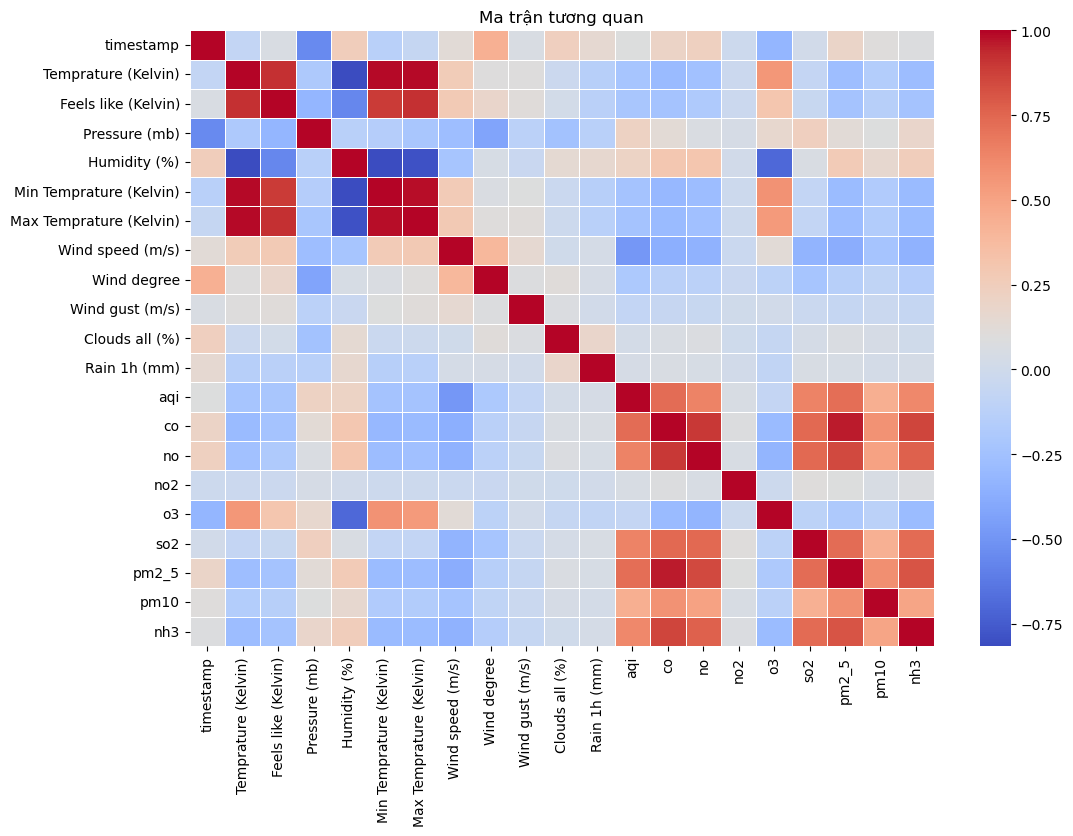

In [13]:
# Step 1: Compute correlation matrix
correlation_matrix = merged_df.corr(method='pearson')  # Use 'spearman' or 'kendall' as needed

# Step 2: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Ma trận tương quan")
plt.show()

## 1. Nhiệt độ và các yếu tố thời tiết:

* Có mối tương quan mạnh giữa các cột liên quan đến nhiệt độ như Temperature (Kelvin), Feels like (Kelvin), và Min Temperature (Kelvin). Điều này cho thấy rằng các yếu tố nhiệt độ có mối quan hệ chặt chẽ với nhau.
* Feels like (Kelvin) có mối tương quan mạnh với các yếu tố nhiệt độ, vì nhiệt độ cảm giác thường bị ảnh hưởng trực tiếp bởi nhiệt độ thực tế.
## 2. Độ ẩm và nhiệt độ:

Cột Humidity (%) có mối tương quan âm nhẹ với các cột nhiệt độ. Điều này là hợp lý, vì khi nhiệt độ tăng lên, độ ẩm có thể giảm (hoặc không có sự thay đổi rõ rệt tùy vào điều kiện cụ thể).
## 3. Gió và các yếu tố thời tiết:

* Các yếu tố như Wind speed (m/s) và Wind gust (m/s) có mối tương quan mạnh với nhau, vì gió mạnh và gió đột ngột thường đi đôi với nhau.
* Wind degree có thể có mối quan hệ nghịch với Wind speed, cho thấy khi gió có xu hướng thay đổi hướng, tốc độ gió có thể giảm.
## 4. Các thành phần không khí (CO, NO2, O3, ...) và điều kiện thời tiết:

* Các thành phần không khí như co, no2, pm2_5, pm10 có mối tương quan mạnh với nhau. Điều này chỉ ra rằng chúng có thể thay đổi theo các điều kiện khí quyển giống nhau, như mức độ ô nhiễm không khí tăng lên cùng với việc gia tăng các hạt bụi mịn.
* Cột aqi (chỉ số chất lượng không khí) có mối tương quan mạnh với các thành phần không khí như co, no2, pm2_5, và pm10, điều này cho thấy rằng chỉ số chất lượng không khí chịu ảnh hưởng trực tiếp từ các yếu tố này.
## 5. Mối quan hệ giữa mưa và các thành phần không khí:

Rain 1h (mm) có mối tương quan nghịch với một số thành phần ô nhiễm như pm2_5, pm10, vì khi mưa, bụi và các hạt ô nhiễm có thể bị rửa trôi, làm giảm nồng độ ô nhiễm trong không khí.